## Importing the libraries

In [103]:
from __future__ import print_function    #adds compatibility to Python2
import pandas as pd
import numpy as np

In [104]:
#using the inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [105]:
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.1.3


In [106]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Importing the dataset

In [107]:
df_can = pd.read_excel("Canada.xlsx", sheet_name= "Canada by Citizenship", skiprows= range(20), skipfooter=2)

## Basic Operations and cleaning

In [108]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [109]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [110]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [111]:
df_can.shape

(195, 43)

## Clean the dataset to remove some columns which are not required

In [112]:
df_can.drop(['Type','Coverage','REG','AREA','DEV'], axis=1, inplace=True)

## Rename some columns 

In [113]:
df_can.rename(columns= {"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

In [114]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


## Adding the Total column

In [115]:
df_can["Total"]=df_can.sum(axis=1)

In [116]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

## Indexing the dataset

In [117]:
df_can.set_index("Country", inplace=True)

Opposite of the set_index() function is reset_index() function.

In [118]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [119]:
df_can.index.name=None

In [120]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [121]:
df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=195)

## For consistency, ensure that all column labels of type string.

In [122]:
all(isinstance(column, str) for column in df_can.columns)

False

## Converting Integer Column names into Strings

In [123]:
df_can.columns= list(map(str, df_can.columns))

In [124]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [125]:
years= list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [126]:
# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

## Visualization using Waffle Chart

In [127]:
import matplotlib.patches as mpatches # needed for waffle Charts

In [128]:
df_dns= df_can.loc[['Denmark','Norway','Sweden']]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Step1- Determining the proportion of each category to the total:

In [129]:
total_values= sum(df_dns['Total'])
category_proportions= [float(value)/total_values for value in df_dns['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dns.index[i],' : ', proportion)

Denmark  :  0.32255663965602777
Norway  :  0.1924094592359848
Sweden  :  0.48503390110798744


Step2- Define the overall size of the waffle chart:

In [130]:
width=40
height=10

total_num_tiles=width*height
print("The total number of tiles is:",total_num_tiles)

The total number of tiles is: 400


Step3- Determining the respective number of tiles for each category:

In [131]:
tiles_per_category=[round(total_num_tiles*proportion) for proportion in category_proportions]

for i,tiles in  enumerate(tiles_per_category):
    print("The corresponding number of tiles in ",df_dns.index[i]," is :",tiles)

The corresponding number of tiles in  Denmark  is : 129
The corresponding number of tiles in  Norway  is : 77
The corresponding number of tiles in  Sweden  is : 194


Step4- Creating a matrix that resembles the waffle chart and populating it:

In [132]:
waffle_chart= np.zeros((height,width))

tile_index=0
category_index=0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]): 
            category_index += 1
            
        waffle_chart[row,col]= category_index
        
print("Waffle Chart Populated!")

Waffle Chart Populated!


In [133]:
print(waffle_chart)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [134]:
print(type(waffle_chart))

<class 'numpy.ndarray'>


Step5- Map the Waffle Chart matrix into a visual:

`matplotlib.pyplot.matshow`

> It displays an array as a matrix in a new figure window.

> The origin is set at the upper left hand corner and rows (first dimension of the array) are displayed horizontally. The aspect ratio of the figure window is that of the array, unless this would make an excessively short or narrow figure.

> Tick labels for the xaxis are placed on top.

> Parameters: 

             a. First parameter is an array to be displayed as a matrix.

             b. Here, we are using another parameter to use the colormap. 

<Figure size 432x288 with 0 Axes>

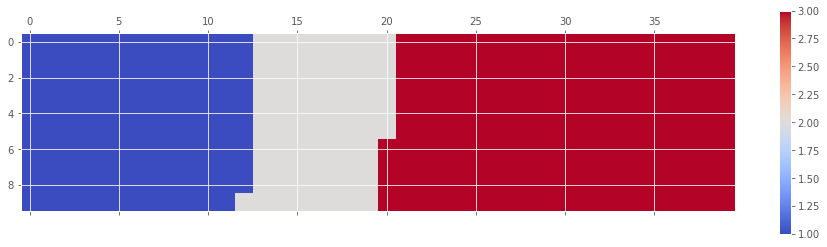

In [135]:
#creating a figure
fig= plt.figure()

colormap= plt.cm.coolwarm

#using matshow to display the waffle chart
plt.matshow(waffle_chart, cmap= colormap)

plt.colorbar()

Step6- Prettifying the chart:

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

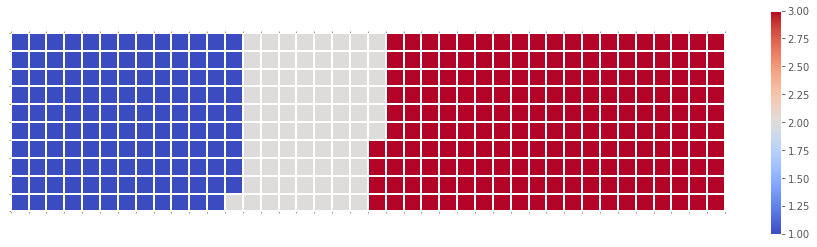

In [136]:
#creating a figure
fig= plt.figure()

colormap= plt.cm.coolwarm

#using matshow to display the waffle chart
plt.matshow(waffle_chart, cmap= colormap)

plt.colorbar()

ax= plt.gca()                                                       #Get the current axes

ax.set_xticks(np.arange(-.5, width, 1), minor= True)                #Set the x ticks with list of ticks
ax.set_yticks(np.arange(-.5, height, 1), minor= True)               #Set the y ticks with list of ticks


ax.grid(which= 'minor', color='w', linestyle='-', linewidth= 2)     #Configure the grid lines

plt.xticks([])
plt.yticks([])

Step7- Creating the legend and adding it to the chart:

In [137]:
#Computes the cumulative sum of the Series
values_cumsum= np.cumsum(df_dns['Total'])
print(values_cumsum)

Denmark     3901
Norway      6228
Sweden     12094
Name: Total, dtype: int64


In [138]:
for i, category in enumerate(df_dns.index.values):
    label_str= category+' ('+ str(df_dns['Total'][i]) + ') '
    print(label_str)

Denmark (3901) 
Norway (2327) 
Sweden (5866) 


In [139]:
for i, category in enumerate(df_dns.index.values):
    color_val= colormap(float(values_cumsum[i])/total_values)
    print(color_val)

(0.6513978391568627, 0.7681214866470587, 0.9958911501294118, 1.0)
(0.8796222636039216, 0.8581749384078431, 0.845843868137255, 1.0)
(0.705673158, 0.01555616, 0.150232812, 1.0)


<Figure size 432x288 with 0 Axes>

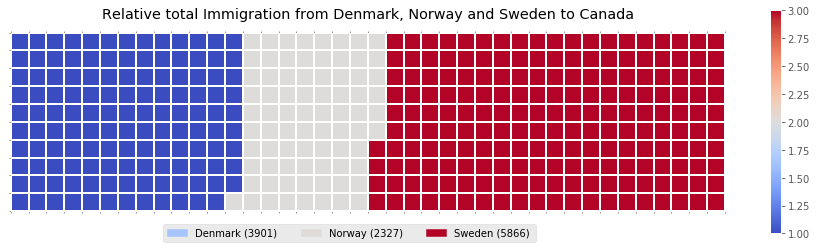

In [140]:
#creating a figure
fig= plt.figure()

colormap= plt.cm.coolwarm

#using matshow to display the waffle chart
plt.matshow(waffle_chart, cmap= colormap)

plt.colorbar()

ax= plt.gca()                                                       #Get the current axes

ax.set_xticks(np.arange(-.5, width, 1), minor= True)                #Set the x ticks with list of ticks
ax.set_yticks(np.arange(-.5, height, 1), minor= True)               #Set the y ticks with list of ticks


ax.grid(which= 'minor', color='w', linestyle='-', linewidth= 2)     #Configure the grid lines

plt.xticks([])
plt.yticks([])


#computing the cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum= np.cumsum(df_dns['Total'])
total_values= values_cumsum[-1]

#Creating legends
legend_handles=[]
for i, category in enumerate(df_dns.index.values):
    label_str= category+' ('+ str(df_dns['Total'][i]) + ') '
    color_val= colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
#adding legend to the chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0.,-0.2,0.95,.1)
          )

plt.title("Relative total Immigration from Denmark, Norway and Sweden to Canada")
plt.show()